# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

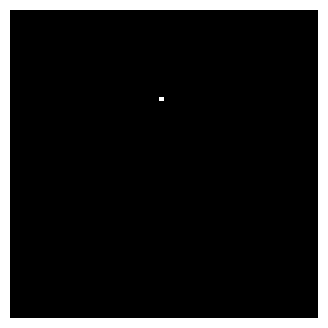

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

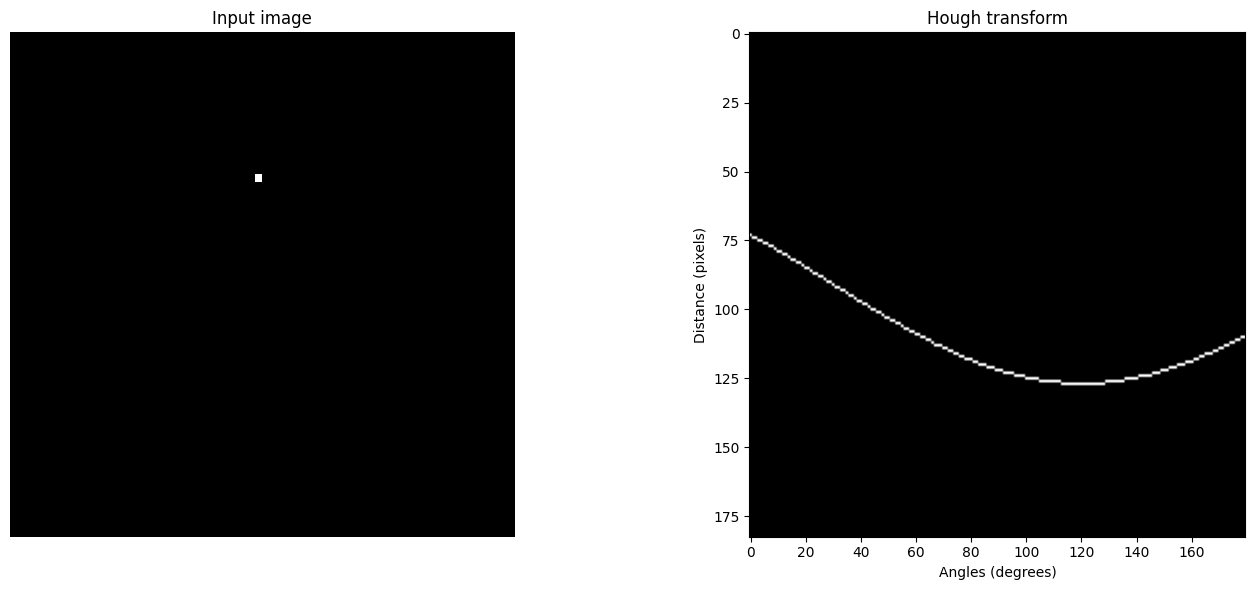

In [3]:
show_hough(hough_line(im)[0], im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

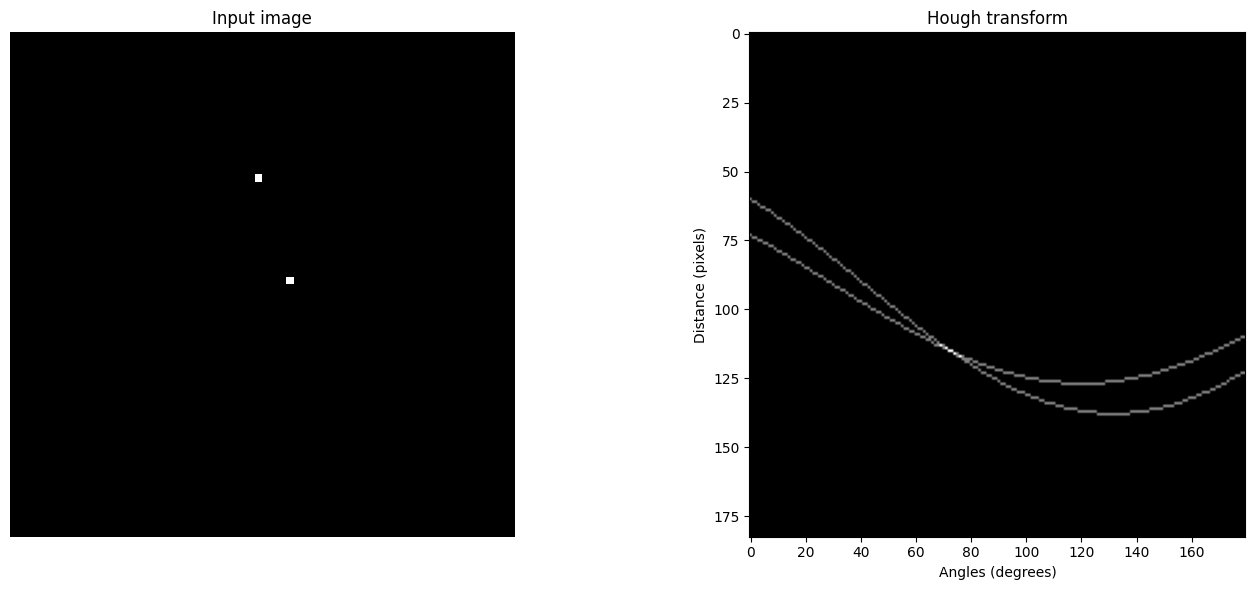

In [4]:
img = np.zeros((64, 64), dtype=np.uint8)
img[18, 31] = 1
img[31, 35] = 1

show_hough(hough_line(img)[0], img)

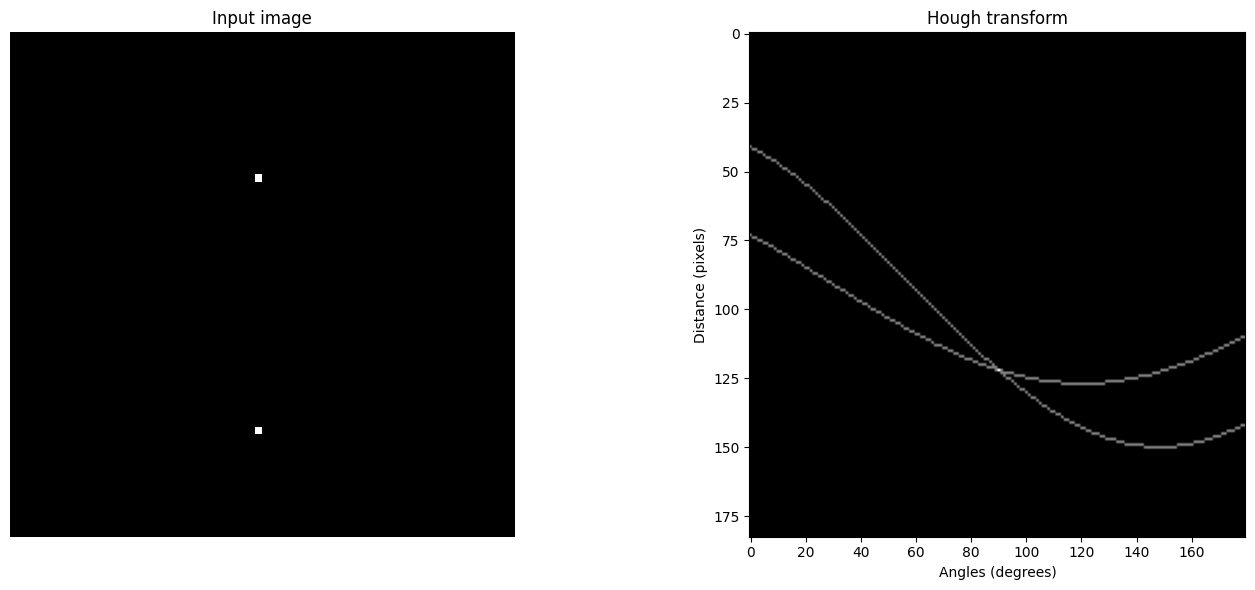

In [5]:
img = np.zeros((64, 64), dtype=np.uint8)
img[18, 31] = 1
img[50, 31] = 1

show_hough(hough_line(img)[0], img)

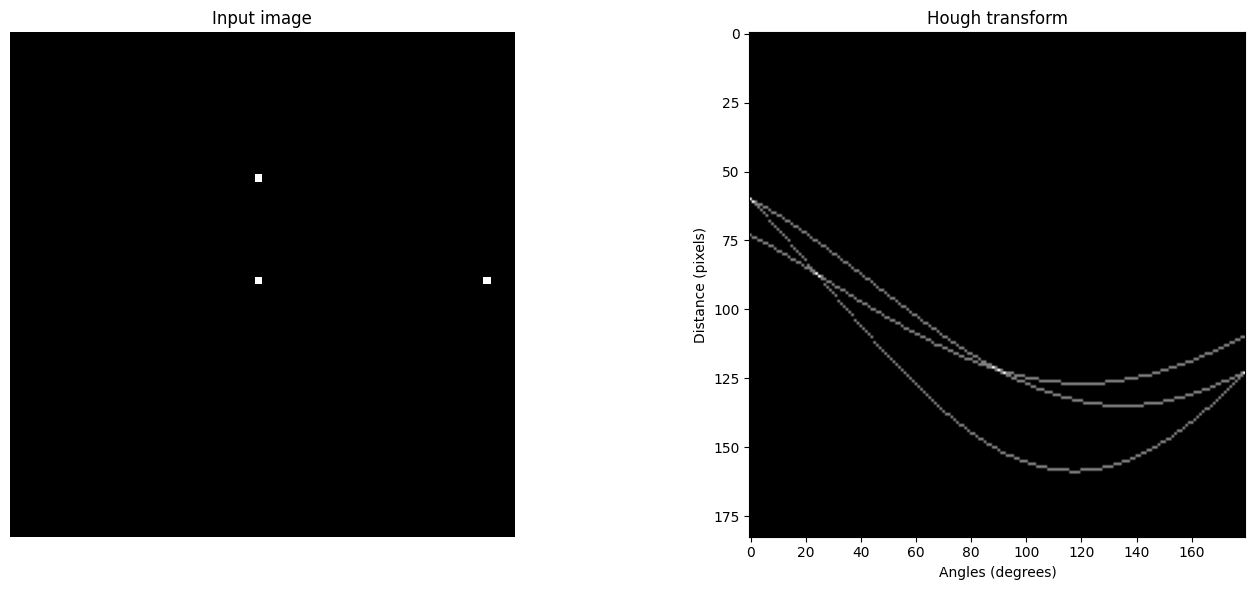

In [6]:
img = np.zeros((64, 64), dtype=np.uint8)
img[18, 31] = 1
img[31, 31] = 1
img[31, 60] = 1

show_hough(hough_line(img)[0], img)

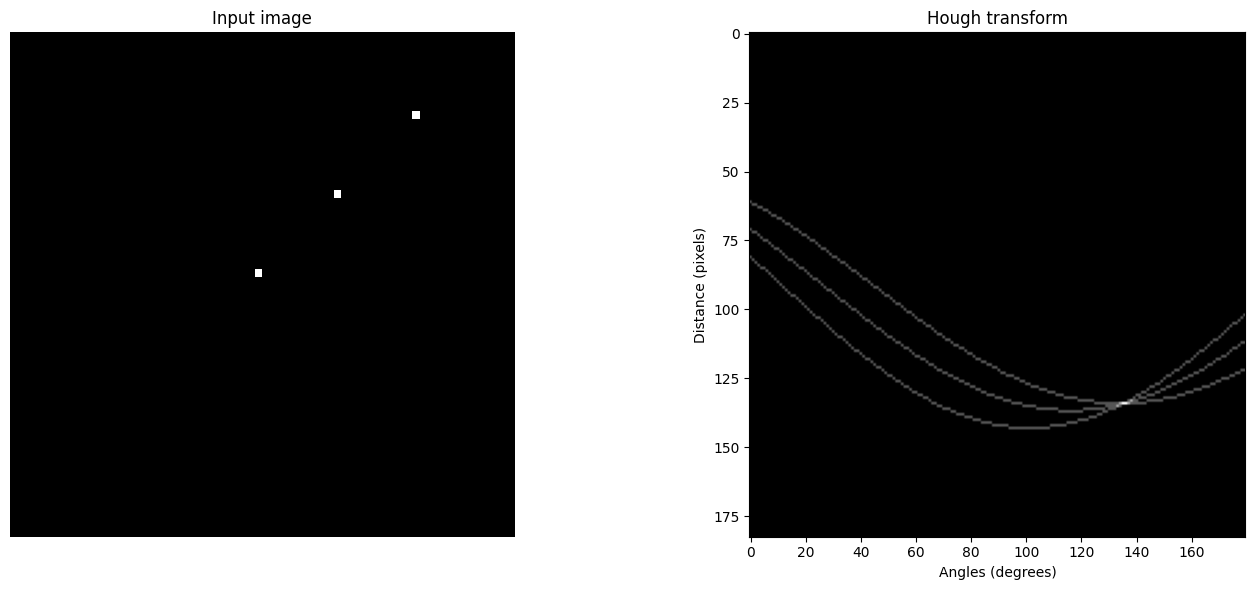

In [7]:
img = np.zeros((64, 64), dtype=np.uint8)
img[10, 51] = 1
img[20, 41] = 1
img[30, 31] = 1

show_hough(hough_line(img)[0], img)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

In [18]:
def plots(**kwargs):

    n = len(kwargs)
    fig, axs = plt.subplots(((n - 1) // 3) + 1, np.min([3, n]))
    fig.set_size_inches(np.min([n * 6, 20]), (((n - 1) // 3) + 1) * 8)
    i = 0

    for key, image in kwargs.items():
        if n == 1:
            axs.imshow(image, "gray")
            axs.axis("off")
            axs.set_title(key)
            axs.set_facecolor("white")
        elif n <= 3:
            axs[i].imshow(image, "gray")
            axs[i].axis("off")
            axs[i].set_title(key)
            axs[i].set_facecolor("white")
        elif n > 3:
            axs[i // 3, i % 3].imshow(image, "gray")
            axs[i // 3, i % 3].set_title(key)
            axs[i // 3, i % 3].set_facecolor("white")

        i += 1

    if n > 1:
        for ax in axs.flat:
            ax.axis("off")

    fig.patch.set_facecolor("white")

    plt.show()

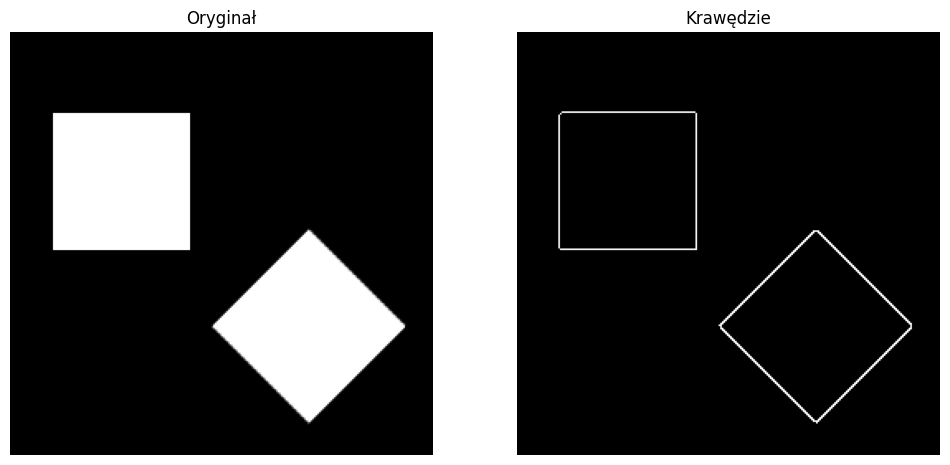

In [22]:
square = cv2.imread("kwadraty.png", cv2.IMREAD_GRAYSCALE)
square_edges = cv2.Canny(square, 100, 200)
images = {"Oryginał": square, "Krawędzie": square_edges}
plots(**images)

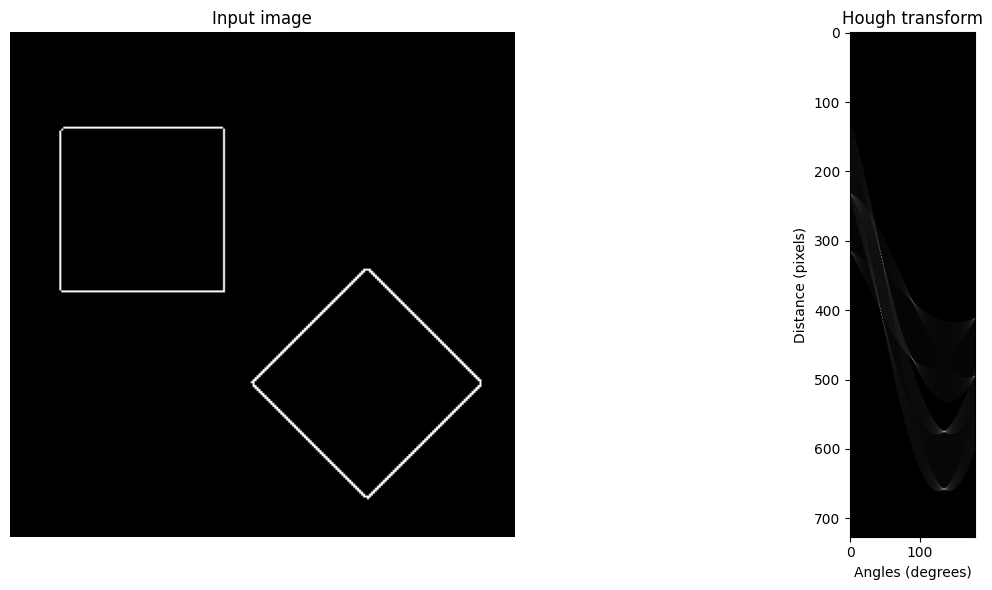

In [23]:
show_hough(hough_line(square_edges)[0], square_edges)

Jak widać można zauważyć, że krawędzi jest 8 i jest także 8 punktów wzmocnionych, które potwierdzają liniowe krawędzie.

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [38]:
H, theta, rho = hough_line(square_edges)
maxes = hough_line_peaks(H, theta, rho)

for array in maxes:
    print(array)

print(f"Znalezione ekstrema: {len(maxes[0])}")

[87 83 81 81 72 72 68 58]
[-1.57079633  0.          0.         -1.57079633 -0.80285146 -0.76794487
  0.76794487  0.78539816]
[-131.  108.   25.  -48.   39.  -35.  212.  294.]
Znalezione ekstrema: 8


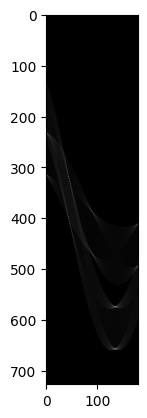

In [32]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

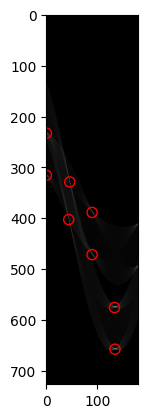

In [40]:
from math import pi

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

for theta, rho in zip(maxes[1], maxes[2]):
    ax.add_patch(plt.Circle((((theta + (0.5 * pi)) / pi) * 180, rho + 0.5 * len(hough_line(square_edges)[0])), 10, color="red", fill=False))

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [41]:
def get_cords(theta, rho):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    return x1, x2, y1, y2

In [49]:
classic_lines = cv2.HoughLines(square_edges, 1, pi / 180, 50)

print(classic_lines)

[[[131.           1.5707964 ]]

 [[108.           0.        ]]

 [[ 25.           0.        ]]

 [[ 48.           1.5707964 ]]

 [[-39.           2.338741  ]]

 [[ 35.           2.3736477 ]]

 [[-48.           2.3736477 ]]

 [[212.           0.7679449 ]]

 [[212.           0.80285144]]

 [[ 44.           2.338741  ]]

 [[132.           1.553343  ]]

 [[130.           1.5882496 ]]

 [[ 39.           2.3561945 ]]

 [[211.           0.7853982 ]]

 [[294.           0.7853982 ]]

 [[ 49.           1.553343  ]]

 [[ 47.           1.5882496 ]]

 [[-43.           2.3561945 ]]]


In [56]:
lines = []
square = cv2.imread("kwadraty.png")

for [[rho, theta]] in classic_lines:
    lines.append([get_cords(theta, rho)])

def add_lines(img, lines):
    copy = img.copy()
    for [[x1, x2, y1, y2]] in lines:
        cv2.line(copy, (x1, y1), (x2, y2), (255,255,0))

    return copy

square_lines = add_lines(square, lines)

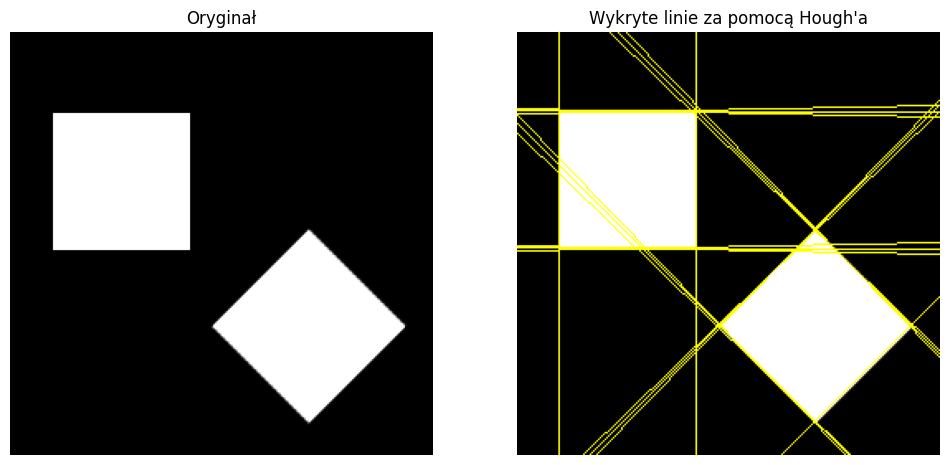

In [58]:
images = {"Oryginał": square, "Wykryte linie za pomocą Hough'a": square_lines}

plots(**images)

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.